In [110]:
!pip install openpyxl
!pip install seaborn
!pip install statsmodels

  Using cached statsmodels-0.14.2-cp310-cp310-macosx_11_0_arm64.whl.metadata (9.2 kB)
  Using cached patsy-0.5.6-py2.py3-none-any.whl.metadata (3.5 kB)
Using cached statsmodels-0.14.2-cp310-cp310-macosx_11_0_arm64.whl (10.1 MB)
Using cached patsy-0.5.6-py2.py3-none-any.whl (233 kB)


In [270]:
!pip install statsforecast

  Using cached numba-0.59.1-cp310-cp310-macosx_11_0_arm64.whl.metadata (2.7 kB)
  Using cached tqdm-4.66.4-py3-none-any.whl.metadata (57 kB)
  Using cached llvmlite-0.42.0-cp310-cp310-macosx_11_0_arm64.whl.metadata (4.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 1.2 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 340.2/340.2 kB 3.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 7.0 MB/s eta 0:00:0000:01
Using cached numba-0.59.1-cp310-cp310-macosx_11_0_arm64.whl (2.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 3.0 MB/s eta 0:00:00
Using cached tqdm-4.66.4-py3-none-any.whl (78 kB)
Using cached llvmlite-0.42.0-cp310-cp310-macosx_11_0_arm64.whl (28.8 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 6.0 MB/s eta 0:00:00


In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [272]:
Data = pd.read_excel("../Data/Case Study_2024.xlsx",sheet_name='Raw Data',header=1)

In [273]:
# Data.columns = ['City', 'Year', 'Month', 'Unit Sales', 'Revenue']

In [274]:
# Month mapping
Data['Month_Year'] = Data['Month'].astype(str)+"-"+Data['Year'].astype(str)

month_mapping = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4,
    'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8,
    'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}
Data['Month'] = Data['Month'].map(month_mapping)
Data['Date'] = pd.to_datetime(Data[['Year', 'Month']].assign(DAY=1))

Data['Actual_Price'] = 250


In [275]:
Data

,City,Year,Month,Unit Sales,Revenue $,Month_Year,Date,Actual_Price
0,1,2015,1,10639,2659750,Jan-2015,2015-01-01,250
1,2,2015,1,24232,6058000,Jan-2015,2015-01-01,250
2,3,2015,1,11861,2965250,Jan-2015,2015-01-01,250
3,4,2015,1,51507,12876750,Jan-2015,2015-01-01,250
4,1,2015,2,15256,3814000,Feb-2015,2015-02-01,250
...,...,...,...,...,...,...,...,...
427,4,2023,11,70126,17531500,Nov-2023,2023-11-01,250
428,1,2023,12,29061,7265250,Dec-2023,2023-12-01,250
429,2,2023,12,76623,19155750,Dec-2023,2023-12-01,250
430,3,2023,12,18420,4605000,Dec-2023,2023-12-01,250


In [276]:
Data['Discount'] = ((Data['Unit Sales'] * Data['Actual_Price']) - Data['Revenue $']) / Data['Unit Sales']

In [277]:
Data['Discount_Flag'] = (Data['Discount']>0).astype(int)

In [278]:
Data.nlargest(10, 'Discount')


,City,Year,Month,Unit Sales,Revenue $,Month_Year,Date,Actual_Price,Discount,Discount_Flag
337,2,2022,1,43154,6473100,Jan-2022,2022-01-01,250,100.0,1
341,2,2022,2,41715,6257250,Feb-2022,2022-02-01,250,100.0,1
345,2,2022,3,50551,7582650,Mar-2022,2022-03-01,250,100.0,1
215,4,2019,6,96210,17221590,Jun-2019,2019-06-01,250,71.0,1
219,4,2019,7,119227,21341633,Jul-2019,2019-07-01,250,71.0,1
223,4,2019,8,101262,18125898,Aug-2019,2019-08-01,250,71.0,1
99,4,2017,1,79742,15868658,Jan-2017,2017-01-01,250,51.0,1
103,4,2017,2,82494,16416306,Feb-2017,2017-02-01,250,51.0,1
107,4,2017,3,81305,16179695,Mar-2017,2017-03-01,250,51.0,1
165,2,2018,6,51268,10202332,Jun-2018,2018-06-01,250,51.0,1


In [281]:
city_2_data = Data[Data['City'] == 2]
city_2_data.reset_index(drop=True, inplace=True)
highest_discount_indices = city_2_data['Discount'].nlargest(25).index
prior_indices = highest_discount_indices - 2
after_indices = highest_discount_indices + 2

pd.concat([city_2_data.iloc[prior_indices],city_2_data.iloc[highest_discount_indices],city_2_data.iloc[after_indices]]).drop_duplicates().sort_index()

,City,Year,Month,Unit Sales,Revenue $,Month_Year,Date,Actual_Price,Discount,Discount_Flag
0,2,2015,1,24232,6058000,Jan-2015,2015-01-01,250,0.0,0
1,2,2015,2,30512,7628000,Feb-2015,2015-02-01,250,0.0,0
2,2,2015,3,27155,6788750,Mar-2015,2015-03-01,250,0.0,0
3,2,2015,4,31835,7958750,Apr-2015,2015-04-01,250,0.0,0
4,2,2015,5,34296,8574000,May-2015,2015-05-01,250,0.0,0
5,2,2015,6,44933,11233250,Jun-2015,2015-06-01,250,0.0,0
6,2,2015,7,52807,13201750,Jul-2015,2015-07-01,250,0.0,0
7,2,2015,8,58461,14615250,Aug-2015,2015-08-01,250,0.0,0
8,2,2015,9,52908,13227000,Sep-2015,2015-09-01,250,0.0,0
9,2,2015,10,44088,11022000,Oct-2015,2015-10-01,250,0.0,0


In [284]:
Data

,City,Year,Month,Unit Sales,Revenue $,Month_Year,Date,Actual_Price,Discount,Discount_Flag
0,1,2015,1,10639,2659750,Jan-2015,2015-01-01,250,0.0,0
4,1,2015,2,15256,3814000,Feb-2015,2015-02-01,250,0.0,0
8,1,2015,3,16559,4139750,Mar-2015,2015-03-01,250,0.0,0
12,1,2015,4,15212,3803000,Apr-2015,2015-04-01,250,0.0,0
16,1,2015,5,21933,5483250,May-2015,2015-05-01,250,0.0,0
...,...,...,...,...,...,...,...,...,...,...
415,4,2023,8,74117,18529250,Aug-2023,2023-08-01,250,0.0,0
419,4,2023,9,70526,17631500,Sep-2023,2023-09-01,250,0.0,0
423,4,2023,10,75363,18840750,Oct-2023,2023-10-01,250,0.0,0
427,4,2023,11,70126,17531500,Nov-2023,2023-11-01,250,0.0,0


In [283]:
# Sort the data by City and Date
Data = Data.sort_values(by=['City', 'Date'])

In [287]:
Data.groupby('City')['Unit Sales'].shift(1)

0          NaN
4      10639.0
8      15256.0
12     16559.0
16     15212.0
        ...   
415    92290.0
419    74117.0
423    70526.0
427    75363.0
431    70126.0
Name: Unit Sales, Length: 432, dtype: float64

In [299]:
# Sort the data by City and Date
Data = Data.sort_values(by=['City', 'Date'])

# Identify the periods just before the discount starts for each city
Data['Pre_Discount_Sales'] = Data.groupby('City')['Unit Sales'].shift(1)
Data['Is_Discount_Start'] = (Data['Discount_Flag'] == 1) & (Data['Discount_Flag'].shift(1) == 0)

# Filter out the rows where the discount starts
pre_discount_data = Data[Data['Is_Discount_Start']]

# Calculate the average unit sales during the discounted periods for each city
average_discount_sales = Data[Data['Discount_Flag'] == 1].groupby('City')['Unit Sales'].mean().reset_index()
average_discount_sales.rename(columns={'Unit Sales': 'Avg_Discount_Unit_Sales'}, inplace=True)

# Merge with pre_discount_data to have both pre-discount and average discount sales side by side
pre_discount_sales = pre_discount_data[['City', 'Pre_Discount_Sales']].drop_duplicates()
merged_discount_data = pd.merge(pre_discount_sales, average_discount_sales, on='City')

# Calculate the sales lift
merged_discount_data['Sales_Lift %'] = 100 * (merged_discount_data['Avg_Discount_Unit_Sales'] - merged_discount_data['Pre_Discount_Sales']) / merged_discount_data['Pre_Discount_Sales']

# Display the result
merged_discount_data

,City,Pre_Discount_Sales,Avg_Discount_Unit_Sales,Sales_Lift %
0,2,31349.0,60125.470588,91.793903
1,2,27523.0,60125.470588,118.455367
2,2,67962.0,60125.470588,-11.530752
3,3,13057.0,21863.052632,67.443154
4,3,15177.0,21863.052632,44.053849
5,3,15025.0,21863.052632,45.511166
6,4,55221.0,81972.250000,48.443980
7,4,62855.0,81972.250000,30.414844
8,4,83481.0,81972.250000,-1.807297


In [301]:
# Calculate the average sales lift per city
average_sales_lift_per_city = merged_discount_data.groupby('City')['Sales_Lift %'].mean().reset_index()
average_sales_lift_per_city.rename(columns={'Sales_Lift %': 'Average_Sales_Lift %'}, inplace=True)

In [323]:
round(average_sales_lift_per_city.set_index('City'))

,Average_Sales_Lift %
City,
2,66.0
3,52.0
4,26.0


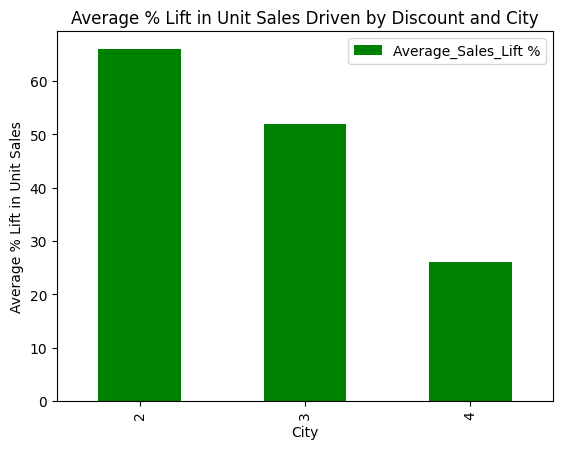

In [322]:
round(average_sales_lift_per_city.set_index('City')).plot(kind='bar', color='green')
plt.title('Average % Lift in Unit Sales Driven by Discount and City')
plt.xlabel('City')
plt.ylabel('Average % Lift in Unit Sales')
plt.show()

In [ ]:
## Month/quatertly/annual sales growth city wise

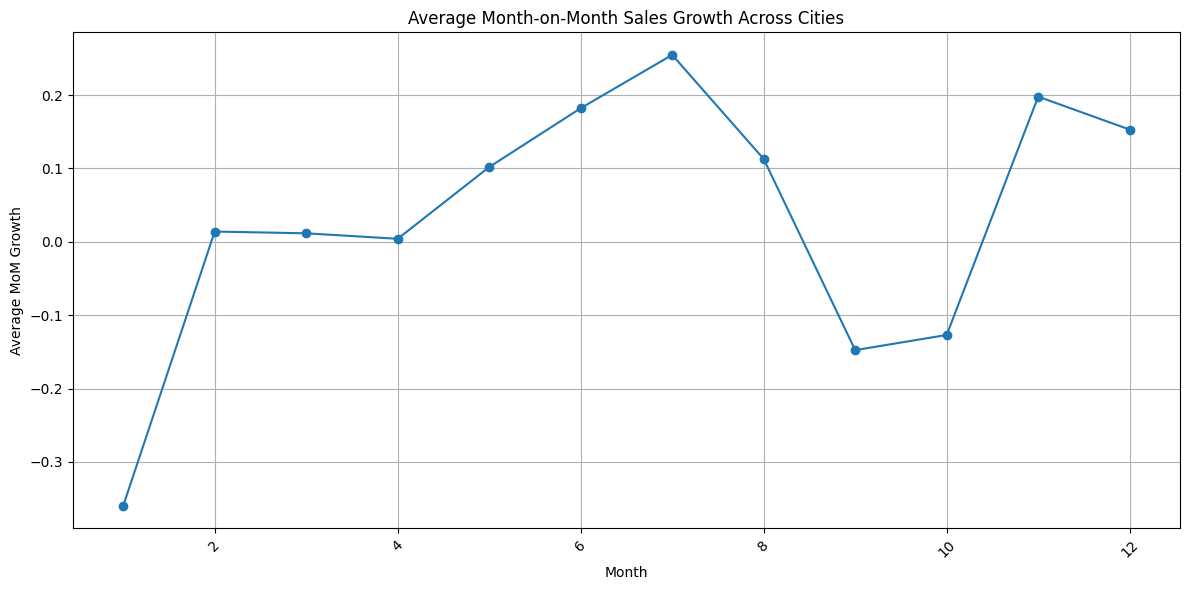

In [324]:
# Calculate average sales growth across cities by month for all years
monthly_growth = Data.groupby(['Year', 'Month', 'City'])['Unit Sales'].sum().reset_index()
monthly_growth['Previous_Unit_Sales'] = monthly_growth.groupby('City')['Unit Sales'].shift(1)
monthly_growth['MoM_Growth'] = (monthly_growth['Unit Sales'] - monthly_growth['Previous_Unit_Sales']) / monthly_growth['Previous_Unit_Sales']

# Remove NaN values resulting from the shift operation
monthly_growth = monthly_growth.dropna(subset=['MoM_Growth'])

# Calculate average MoM growth for each month across all years
average_monthly_growth = monthly_growth.groupby('Month')['MoM_Growth'].mean().reset_index()

# Plot the average month-on-month growth
plt.figure(figsize=(12, 6))
plt.plot(average_monthly_growth['Month'], average_monthly_growth['MoM_Growth'], marker='o')
plt.title('Average Month-on-Month Sales Growth Across Cities')
plt.xlabel('Month')
plt.ylabel('Average MoM Growth')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [325]:
city_4_data = Data[Data['City'] == 4]
city_4_data.reset_index(drop=True, inplace=True)
highest_discount_indices = city_4_data['Discount'].nlargest(10).index
prior_indices = highest_discount_indices - 2
after_indices = highest_discount_indices + 2

pd.concat([city_4_data.iloc[prior_indices],city_4_data.iloc[highest_discount_indices],city_4_data.iloc[after_indices]]).drop_duplicates().sort_index()


,City,Year,Month,Unit Sales,Revenue $,Month_Year,Date,Actual_Price,Discount,Discount_Flag,Pre_Discount_Sales,Is_Discount_Start
15,4,2016,4,55289,13822250,Apr-2016,2016-04-01,250,0.0,0,49138.0,False
17,4,2016,6,62003,13950675,Jun-2016,2016-06-01,250,25.0,1,55221.0,True
19,4,2016,8,58137,13080825,Aug-2016,2016-08-01,250,25.0,1,72226.0,False
22,4,2016,11,64727,14563575,Nov-2016,2016-11-01,250,25.0,1,57501.0,False
23,4,2016,12,68811,15482475,Dec-2016,2016-12-01,250,25.0,1,64727.0,False
24,4,2017,1,79742,15868658,Jan-2017,2017-01-01,250,51.0,1,68811.0,False
25,4,2017,2,82494,16416306,Feb-2017,2017-02-01,250,51.0,1,79742.0,False
26,4,2017,3,81305,16179695,Mar-2017,2017-03-01,250,51.0,1,82494.0,False
27,4,2017,4,56945,14236250,Apr-2017,2017-04-01,250,0.0,0,81305.0,False
28,4,2017,5,58813,14703250,May-2017,2017-05-01,250,0.0,0,56945.0,False


In [122]:
# city_3_data = Data[Data['City'] == 3]
# city_3_data.reset_index(drop=True, inplace=True)
# highest_discount_indices = city_3_data['Discount'].nlargest(20).index
# prior_indices = highest_discount_indices - 2
# after_indices = highest_discount_indices + 2

# pd.concat([city_3_data.iloc[prior_indices],city_3_data.iloc[highest_discount_indices],city_3_data.iloc[after_indices]]).drop_duplicates().sort_index()


## 1)  The product sells for $250. At times, however, the product has been discounted to drive sales. Which city had the most significant price discount and when did this occur?

In [124]:
Data.loc[Data.groupby('City')['Discount'].idxmax()]

,City,Year,Month,Unit Sales,Revenue $,Month_Year,Date,Actual_Price,Discount,Discount_Flag
0,1,2015,1,10639,2659750,Jan-2015,2015-01-01,250,0.0,0
337,2,2022,1,43154,6473100,Jan-2022,2022-01-01,250,100.0,1
314,3,2021,7,21942,4366458,Jul-2021,2021-07-01,250,51.0,1
215,4,2019,6,96210,17221590,Jun-2019,2019-06-01,250,71.0,1


In [136]:
Data['Discount_Flag'].value_counts(normalize=True)

0    0.87963
1    0.12037
Name: Discount_Flag, dtype: float64

In [143]:
Data[Data['City']==4]['Discount_Flag'].value_counts(normalize=True)

0    0.851852
1    0.148148
Name: Discount_Flag, dtype: float64

## Price/Discount sensitivity 

In [144]:
# Prepare the data by calculating the actual price
Data['Actual Price'] = Data['Revenue $'] / Data['Unit Sales']

City_data = Data[Data['City']==2]

# Perform a regression analysis with unit sales as the dependent variable and actual price as the independent variable
X_price = City_data[['Actual Price']]
y_sales = City_data['Unit Sales']
X_price = sm.add_constant(X_price)  # Add a constant term to the predictor

model_price_sales = sm.OLS(y_sales, X_price).fit()
price_sales_summary = model_price_sales.summary()

price_sales_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Unit Sales   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     11.51
Date:                Wed, 29 May 2024   Prob (F-statistic):           0.000975
Time:                        13:27:38   Log-Likelihood:                -1184.2
No. Observations:                 108   AIC:                             2372.
Df Residuals:                     106   BIC:                             2378.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           9.9e+04    1.6e+04      6.197      0.000    6.73e+04    1.31e+05
Actual Price  -222.8458     65.689     -3.392      0.001    -353.081     -92.611
==============================================================================
Omnibus:                       11.893   Durbin-Watson:                   1.019
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                6.025
Skew:                           0.376   Prob(JB):                       0.0492
Kurtosis:                       2.120   Cond. No.                     2.86e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.86e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [145]:
# Prepare the data by calculating the actual price
Data['Actual Price'] = Data['Revenue $'] / Data['Unit Sales']

City_data = Data[Data['City']==3]

# Perform a regression analysis with unit sales as the dependent variable and actual price as the independent variable
X_price = City_data[['Actual Price']]
y_sales = City_data['Unit Sales']
X_price = sm.add_constant(X_price)  # Add a constant term to the predictor

model_price_sales = sm.OLS(y_sales, X_price).fit()
price_sales_summary = model_price_sales.summary()

price_sales_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Unit Sales   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     46.83
Date:                Wed, 29 May 2024   Prob (F-statistic):           5.18e-10
Time:                        13:27:48   Log-Likelihood:                -1045.5
No. Observations:                 108   AIC:                             2095.
Df Residuals:                     106   BIC:                             2100.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         6.201e+04   6752.030      9.185      0.000    4.86e+04    7.54e+04
Actual Price  -188.9503     27.611     -6.843      0.000    -243.693    -134.208
==============================================================================
Omnibus:                       11.376   Durbin-Watson:                   0.885
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                6.940
Skew:                           0.462   Prob(JB):                       0.0311
Kurtosis:                       2.169   Cond. No.                     4.39e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [146]:
# Prepare the data by calculating the actual price
Data['Actual Price'] = Data['Revenue $'] / Data['Unit Sales']

City_data = Data[Data['City']==4]

# Perform a regression analysis with unit sales as the dependent variable and actual price as the independent variable
X_price = City_data[['Actual Price']]
y_sales = City_data['Unit Sales']
X_price = sm.add_constant(X_price)  # Add a constant term to the predictor

model_price_sales = sm.OLS(y_sales, X_price).fit()
price_sales_summary = model_price_sales.summary()

price_sales_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Unit Sales   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     70.20
Date:                Wed, 29 May 2024   Prob (F-statistic):           2.43e-13
Time:                        13:27:52   Log-Likelihood:                -1151.2
No. Observations:                 108   AIC:                             2306.
Df Residuals:                     106   BIC:                             2312.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.888e+05   1.46e+04     12.953      0.000     1.6e+05    2.18e+05
Actual Price  -500.0519     59.683     -8.378      0.000    -618.379    -381.725
==============================================================================
Omnibus:                        2.101   Durbin-Watson:                   0.535
Prob(Omnibus):                  0.350   Jarque-Bera (JB):                2.136
Skew:                           0.316   Prob(JB):                        0.344
Kurtosis:                       2.727   Cond. No.                     3.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [147]:
Data

,City,Year,Month,Unit Sales,Revenue $,Month_Year,Date,Actual_Price,Discount,Discount_Flag,Sales Growth,Sales Lift,Actual Price
0,1,2015,1,10639,2659750,Jan-2015,2015-01-01,250,0.0,0,NaN,-0.717898,250.0
1,2,2015,1,24232,6058000,Jan-2015,2015-01-01,250,0.0,0,NaN,-0.357469,250.0
2,3,2015,1,11861,2965250,Jan-2015,2015-01-01,250,0.0,0,NaN,-0.685496,250.0
3,4,2015,1,51507,12876750,Jan-2015,2015-01-01,250,0.0,0,NaN,0.365750,250.0
4,1,2015,2,15256,3814000,Feb-2015,2015-02-01,250,0.0,0,0.433969,-0.595475,250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,4,2023,11,70126,17531500,Nov-2023,2023-11-01,250,0.0,0,-0.069490,0.859448,250.0
428,1,2023,12,29061,7265250,Dec-2023,2023-12-01,250,0.0,0,-0.093572,-0.229424,250.0
429,2,2023,12,76623,19155750,Dec-2023,2023-12-01,250,0.0,0,0.380669,1.031722,250.0
430,3,2023,12,18420,4605000,Dec-2023,2023-12-01,250,0.0,0,0.182209,-0.511579,250.0


In [190]:
# Step 3: Calculate the average lift in unit sales by discount
def average_lift_in_unit_sales(city_data):
    avg_sales_discounted = city_data[city_data['Discount'] > 0]['Unit Sales'].mean()
    avg_sales_non_discounted = city_data[city_data['Discount'] == 0]['Unit Sales'].mean()
    lift = avg_sales_discounted - avg_sales_non_discounted
    return lift

average_lift_by_city = Data.groupby('City').apply(average_lift_in_unit_sales)

In [197]:
lift = pd.DataFrame(average_lift_by_city.reset_index())
lift.columns = ['City', 'Average Lift in Unit Sales by Discount']

In [207]:
round(lift)

,City,Average Lift in Unit Sales by Discount
0,1,NaN
1,2,17950.0
2,3,7259.0
3,4,17632.0


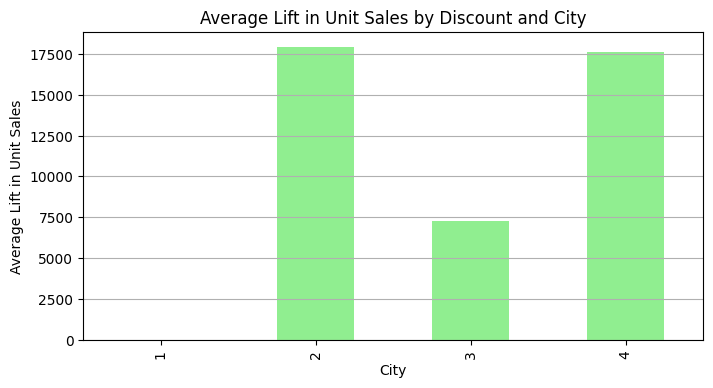

In [202]:
# Bar Chart for Average Lift in Unit Sales by Discount and City
plt.figure(figsize=(8, 4))
average_lift_by_city.plot(kind='bar', color='lightgreen')
plt.title('Average Lift in Unit Sales by Discount and City')
plt.xlabel('City')
plt.ylabel('Average Lift in Unit Sales')
plt.grid(axis='y')
plt.show()